# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [ ]:
NAME = "IAD32"
COLLABORATORS = "Marcin Słyś 408197, Michał Surówka 402299, Karol Śliwa 406441"

---

## Zestaw zadań 3: Elementy statystyki opisowej 3 (Notatnik 2/4)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import datetime
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
import matplotlib.patches as mpatches

### Wczytanie danych
Wczytaj dane z przygotowanych wcześniej plików bike_traffic_data.pkl i  weather_data.pkl do tablic `bike_traffic_data` oraz `weather_data`.

Wyświetl przygotowane tablice.

In [3]:
# Ruch rowerowy
# YOUR CODE HERE
bike_traffic_data = pd.read_pickle('bike_traffic_data.pkl')
bike_traffic_data.style.format(precision=0).hide(axis=0, subset=bike_traffic_data.index[12:-12])

,Total,East,West
Date,,,
2022-01-01 00:00,0,0,0
2022-01-01 01:00,0,0,0
2022-01-01 02:00,1,0,1
2022-01-01 03:00,0,0,0
2022-01-01 04:00,0,0,0
2022-01-01 05:00,1,1,0
2022-01-01 06:00,1,1,0
2022-01-01 07:00,1,1,0
2022-01-01 08:00,3,3,0


In [4]:
# Pogoda
# YOUR CODE HERE
weather_data = pd.read_pickle('weather_data.pkl')
weather_data.style.format(precision=2).hide(axis=0, subset=weather_data.index[10:-10])

### Zadnie 2: Przegląd danych - ruch rowerowy [15 pkt]

#### a) Tabele

Przygotuj trzy tablice prezentujące różne aspekty ruchu rowerowego według poniższych wytycznych.

Tablica `daily_bike_traffic_data` prezentuje sumaryczną liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.
> Indeks: Date</br>
> PeriodIndex zawierający okresy czasu, w których dokonywane były zliczenia rowerzystów.</br>

> Kolumny: Total, East, West</br>
> Kolumny zawierają liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.
       
Tablica `bike_traffic_by_weekday_data` prezentuje średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.

> Indeks: Day</br>
> Dni tygodnia (Monday, Tuesday ... ).</br>

> Kolumny: Total, East, West</br>
> Kolumny zawierają średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.
    
Tablica `weekday_weekend_hourly_bike_traffic_data`  prezentuje średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu, a także z podziałem na dni robocze i weekend.

> Indeks: Hour </br>
> Godziny, dla których liczone są wartości średnie (0, 1, 2 ...).

> Kolumny: </br>
> 1 rzędu: Weekday, Weekend</br>
> 2 rzędu: Total, East, West (ten sam zestaw kolumn dla każdego okresu tygodnia)</br>
> Kolumny zawierają średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w sumie oraz wraz z podziałem na zachodnią i wschodnią stronę mostu.

Zapisz tablicę `daily_bike_traffic_data` do pliku daily_bike_traffic_data.pkl.

Wyświetl przygotowane tablice w taki sposób aby zawarte w nich liczby rowerzystów wyświetlały się z dokładnością 0 miejsc po przecinku, a średnie liczby rowerzystów z dokładnością 2 miejsc po przecinku. W przypadku tablicy `daily_bike_traffic_data` wyświetl tylko 10 pierwszych wierszy tablicy.

In [5]:
# Agregacja danych z poszczególnych dni roku
# YOUR CODE HERE
dates_index = weather_data.index

bike_traffic_data_copy = bike_traffic_data.copy()
bike_traffic_data_copy['date'] = bike_traffic_data.index.to_timestamp().date
daily_bike_traffic_data = bike_traffic_data_copy.groupby('date').sum()
daily_bike_traffic_data.index = dates_index
daily_bike_traffic_data.to_pickle('daily_bike_traffic_data.pkl')
daily_bike_traffic_data.style.format(precision=0).hide(axis=0, subset=daily_bike_traffic_data.index[10:])

,Total,East,West
Date,,,
2022-01-01,33,23,10
2022-01-02,37,20,17
2022-01-03,253,93,160
2022-01-04,577,220,357
2022-01-05,713,261,452
2022-01-06,588,231,357
2022-01-07,650,250,400
2022-01-08,1147,548,599
2022-01-09,1923,912,1011


In [7]:
# Agregacja danych z poszczególnych dni tygodnia
# YOUR CODE HERE
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_bike_traffic_data_copy = daily_bike_traffic_data.copy()
daily_bike_traffic_data_copy['weekday_nr'] = daily_bike_traffic_data_copy.index.weekday
daily_bike_traffic_data_copy['Day'] = [weekdays[el] for el in daily_bike_traffic_data_copy['weekday_nr']]
daily_bike_traffic_data_copy

bike_traffic_by_weekday_data = daily_bike_traffic_data_copy.groupby('Day').mean()
bike_traffic_by_weekday_data = bike_traffic_by_weekday_data[['Total', 'East', 'West']]
bike_traffic_by_weekday_data = bike_traffic_by_weekday_data.reindex(weekdays)
bike_traffic_by_weekday_data.style.format(precision=2)

,Total,East,West
Day,,,
Monday,2093.15,820.81,1272.35
Tuesday,2579.96,983.83,1596.13
Wednesday,2538.46,971.58,1566.88
Thursday,2406.71,926.60,1480.12
Friday,2087.44,843.54,1243.90
Saturday,1929.96,843.92,1086.04
Sunday,1664.44,771.58,892.87


In [8]:
# Agregacja danych z konkretnych okresów tygodnia (dzień roboczy/weekend)
# YOUR CODE HERE
hours = [i for i in range(24)]

day_types = ['Weekdays', 'Weekend']
col_index = pd.MultiIndex.from_product([day_types, bike_traffic_data.columns.to_list()])
weekday_weekend_hourly_bike_traffic_data = pd.DataFrame(index=hours, columns=col_index)
weekday_weekend_hourly_bike_traffic_data.index.name = 'Hour'

bike_traffic_data_copy2 = bike_traffic_data.copy()
bike_traffic_data_copy2 = bike_traffic_data_copy2[bike_traffic_data_copy2.index.weekday < 5]
bike_traffic_data_copy2 = bike_traffic_data_copy2.groupby(bike_traffic_data_copy2.index.hour).mean()

bike_traffic_data_copy3 = bike_traffic_data.copy()
bike_traffic_data_copy3 = bike_traffic_data_copy3[bike_traffic_data_copy3.index.weekday >= 5]
bike_traffic_data_copy3 = bike_traffic_data_copy3.groupby(bike_traffic_data_copy3.index.hour).mean()

bike_traffic_data_copy3
weekday_weekend_hourly_bike_traffic_data['Weekdays'] = bike_traffic_data_copy2.values
weekday_weekend_hourly_bike_traffic_data['Weekend'] = bike_traffic_data_copy3.values

weekday_weekend_hourly_bike_traffic_data.style.format(precision=2)

In [9]:
### Komórka testowa

## Tabela 1
daily_bike_traffic_data
# Test 1 Kształt tablicy
assert daily_bike_traffic_data.shape == (365, 3)
# Test 2 Kolumny
assert len(set(list(daily_bike_traffic_data.columns)) & set(['Total', 'East', 'West'])) == 3
# Test 3 Indeks
assert (daily_bike_traffic_data.index.name == 'Date') == True
assert isinstance(daily_bike_traffic_data.index, pd.PeriodIndex)
assert daily_bike_traffic_data.index.values.min() == pd.Period('2022-01-01', 'D')
assert daily_bike_traffic_data.index.values.max() == pd.Period('2022-12-31', 'D')
# Test 4 Zawartość kolumn
assert np.all(np.isclose(daily_bike_traffic_data[['Total', 'East', 'West']].min().values, np.array([23., 12., 10.]))) == True
assert np.all(np.isclose(daily_bike_traffic_data[['Total', 'East', 'West']].max().values, np.array([4233., 1733., 3031.]))) == True

## Tabela 2
# Test 1 Kształt tablicy
assert bike_traffic_by_weekday_data.shape == (7, 3)
# Test 2 Kolumny
assert len(set(list(bike_traffic_by_weekday_data.columns)) & set(['Total', 'East', 'West'])) == 3
# Test 3 Indeks
assert (bike_traffic_by_weekday_data.index.name == 'Day') == True
assert len(set(list(bike_traffic_by_weekday_data.index)) & set(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])) == 7
# Test 4 Zawartość kolumn
assert np.all(np.isclose(bike_traffic_by_weekday_data.min().values, np.array([1664.44230769,  771.57692308,  892.86538462]))) == True
assert np.all(np.isclose(bike_traffic_by_weekday_data.max().values, np.array([2579.96153846,  983.82692308, 1596.13461538]))) == True

## Tabela 3
# Test 1 Kształt tablicy
assert weekday_weekend_hourly_bike_traffic_data.shape == (24, 6)
# Test 2 Kolumny
assert len(set(list(weekday_weekend_hourly_bike_traffic_data.columns)) & set(list(weekday_weekend_hourly_bike_traffic_data.columns))) == 6
# Test 3 Indeks
assert (weekday_weekend_hourly_bike_traffic_data.index.name == 'Hour') == True
assert weekday_weekend_hourly_bike_traffic_data.index.values.min() == 0
assert weekday_weekend_hourly_bike_traffic_data.index.values.max() == 23
# Test 4 Zawartość kolumn
assert np.all(np.isclose(weekday_weekend_hourly_bike_traffic_data.min().values, np.array([1.75, 0.87307692, 0.87692308, 2.82857143, 1.07619048, 1.53333333]))) == True
assert np.all(np.isclose(weekday_weekend_hourly_bike_traffic_data.max().values, np.array([324.42307692, 99.01923077, 225.72307692, 187.73333333, 87.79047619, 99.94285714]))) == True

#### b) Wykresy

Zwizualizuj dane z tablic `daily_bike_traffic_data`, `bike_traffic_by_weekday_data` oraz `weekday_weekend_hourly_bike_traffic_data` za pomocą wykresów liniowych. Przygotuj:
- wykres prezentujący liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach roku w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych dniach tygodnia w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w dni robocze w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu,
- wykres prezentujący średnią liczbę rowerzystów przejeżdżających przez most w poszczególnych godzinach w weekendy w sumie oraz z podziałem na zachodnią i wschodnią stronę mostu.

Zestaw wykresy na pojedynczej figurze (siatka wykresów 2x3, przy czym wykres sum dziennych zajmuje wszystkie trzy pola w górnym wierszu figury). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresów poszczególnych parametrów (każdy z parametrów ma na wszystkich wykresach ten sam kolor),
- dodaj do figury pojedynczą legendę zawierającą nazwy zwizualizowanych parametrów i zlokalizowaną w dolnej części figury, pod wykresami,
- dopasuj zakresy osi wykresów do zakresu wartości danych.

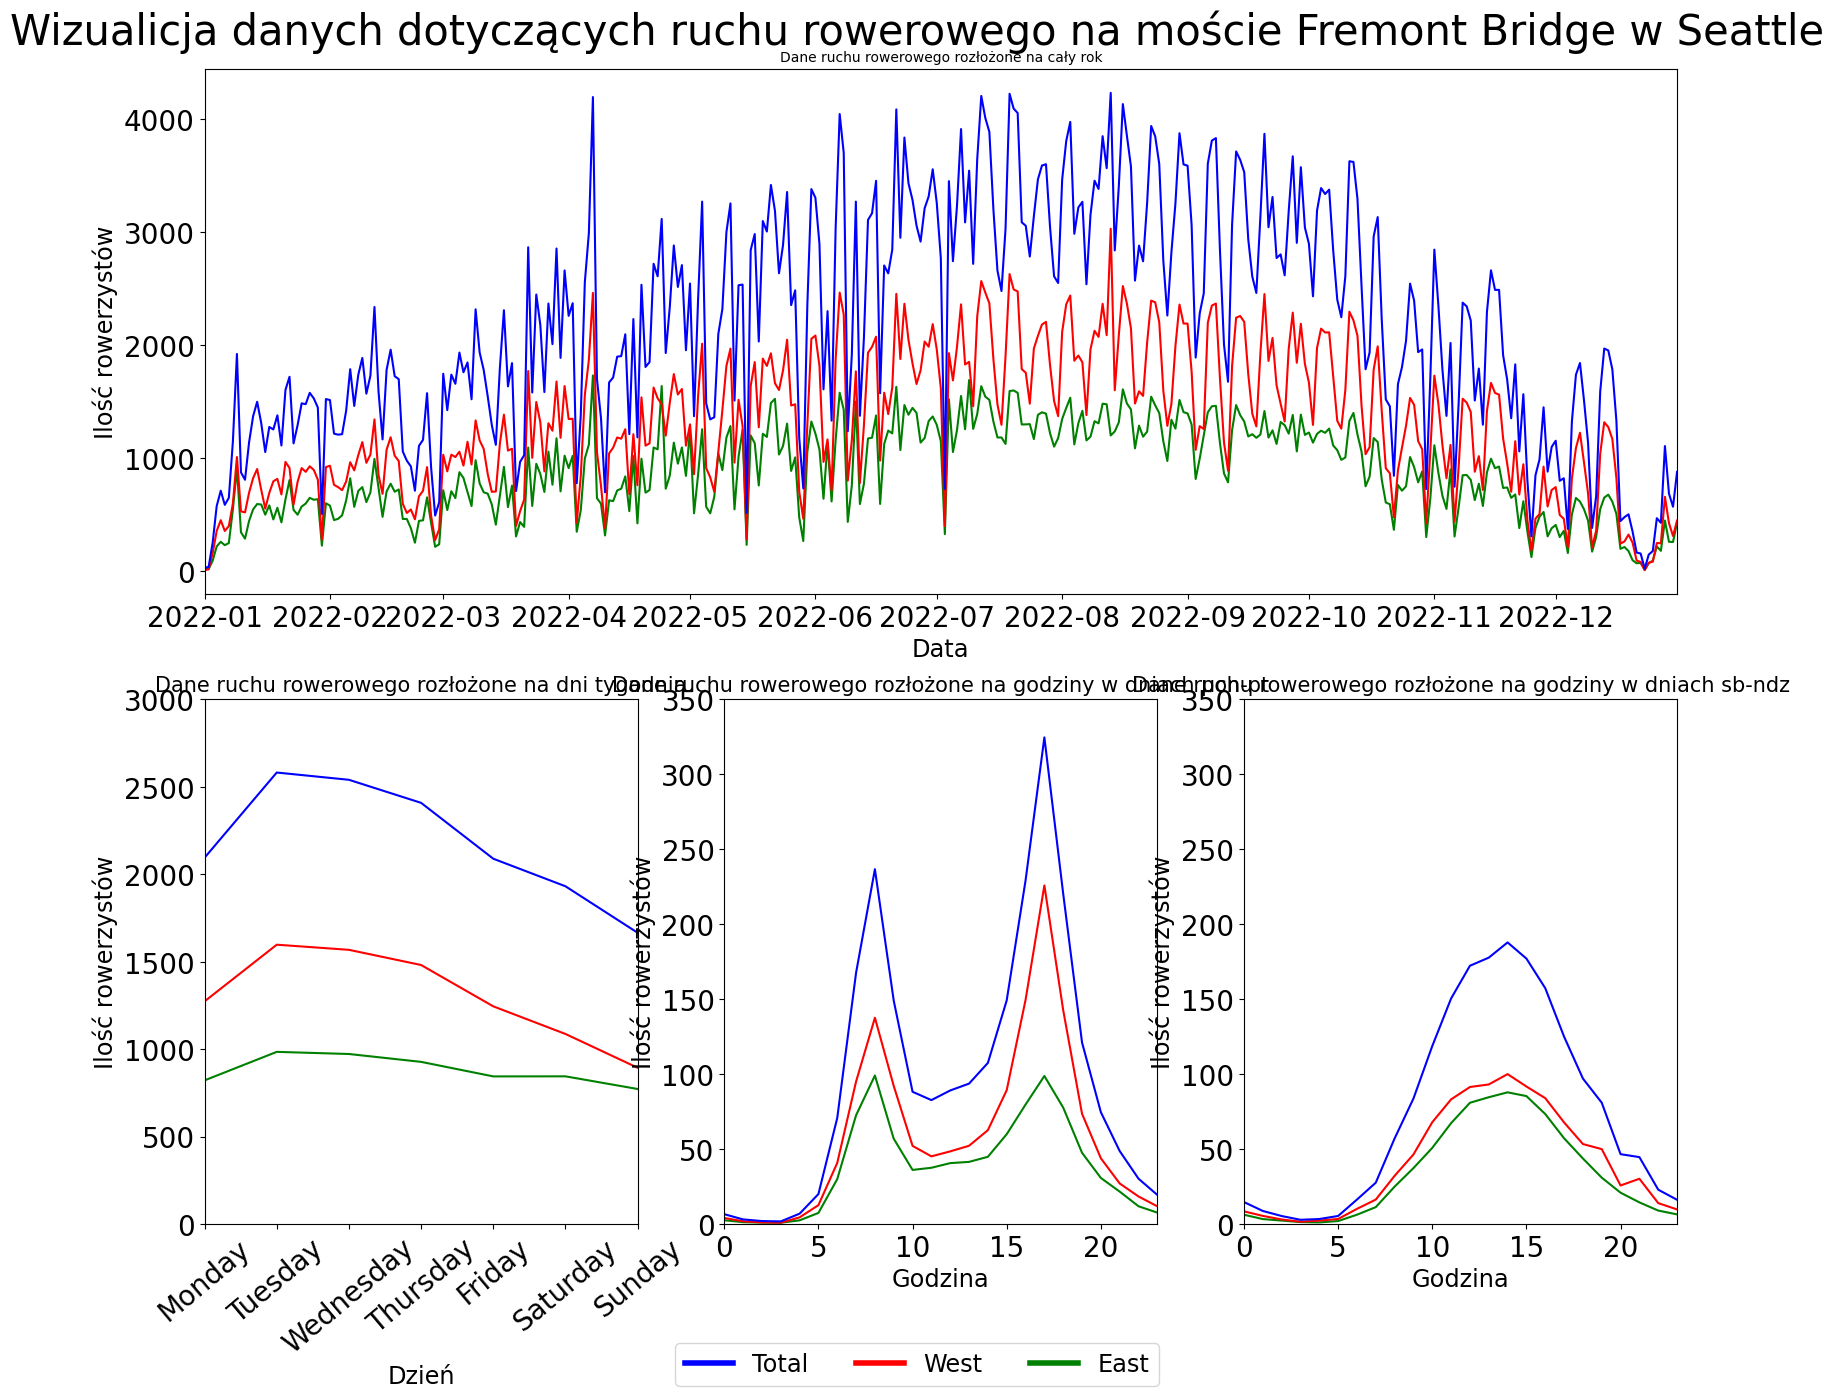

In [10]:
fig = plt.figure(figsize=(19,15))
fig.suptitle('Wizualicja danych dotyczących ruchu rowerowego na moście Fremont Bridge w Seattle', fontsize=30, y=0.92)

ax1 = plt.subplot(211)
ax2 = plt.subplot(234)
ax3 = plt.subplot(235)
ax4 = plt.subplot(236)

pom = daily_bike_traffic_data.copy()
pom.index = pom.index.to_timestamp()

sns.lineplot(y='East', x=pom.index, data=pom, ax=ax1, color='green')
sns.lineplot(y='West', x=pom.index, data=pom, ax=ax1, color='red')
sns.lineplot(y='Total', x=pom.index, data=pom, ax=ax1, color='blue')
ax1.set_title('Dane ruchu rowerowego rozłożone na cały rok', fontsize=10)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_ylabel('Ilość rowerzystów', fontsize='xx-large')
ax1.set_xlabel('Data', fontsize='xx-large')
ax1.set_xlim([pom.index.values[0], pom.index.values[-1]])

pom = bike_traffic_by_weekday_data.copy()
sns.lineplot(y='East', x=pom.index, data=pom, ax=ax2, color='green')
sns.lineplot(y='West', x=pom.index, data=pom, ax=ax2, color='red')
sns.lineplot(y='Total', x=pom.index, data=pom, ax=ax2, color='blue')
ax2.set_title('Dane ruchu rowerowego rozłożone na dni tygodnia', fontsize=15)
ax2.tick_params(axis='x', labelsize=20, labelrotation=40)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xlim([pom.index.values[0], pom.index.values[-1]])
ax2.set_ylabel('Ilość rowerzystów', fontsize='xx-large')
ax2.set_xlabel('Dzień', fontsize='xx-large')
ax2.set_ylim([0, 3000])

pom = weekday_weekend_hourly_bike_traffic_data['Weekdays']
sns.lineplot(y='East', x=pom.index, data=pom, ax=ax3, color='green')
sns.lineplot(y='West', x=pom.index, data=pom, ax=ax3, color='red')
sns.lineplot(y='Total', x=pom.index, data=pom, ax=ax3, color='blue')
ax3.set_title('Dane ruchu rowerowego rozłożone na godziny w dniach pon-pt', fontsize=15)
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
ax3.set_xlim([pom.index.values[0], pom.index.values[-1]])
ax3.set_ylabel('Ilość rowerzystów', fontsize='xx-large')
ax3.set_xlabel('Godzina', fontsize='xx-large')
ax3.set_ylim([0, 350])

pom = weekday_weekend_hourly_bike_traffic_data['Weekend']
sns.lineplot(y='East', x=pom.index, data=pom, ax=ax4, color='green')
sns.lineplot(y='West', x=pom.index, data=pom, ax=ax4, color='red')
sns.lineplot(y='Total', x=pom.index, data=pom, ax=ax4, color='blue')
ax4.set_title('Dane ruchu rowerowego rozłożone na godziny w dniach sb-ndz', fontsize=15)
ax4.tick_params(axis='x', labelsize=20)
ax4.tick_params(axis='y', labelsize=20)
ax4.set_xlim([pom.index.values[0], pom.index.values[-1]])
ax4.set_ylabel('Ilość rowerzystów', fontsize='xx-large')
ax4.set_xlabel('Godzina', fontsize='xx-large')
ax4.set_ylim([0, 350])

legend_elements = [mpl.lines.Line2D([0], [0], color='blue', lw=4), mpl.lines.Line2D([0], [0], color='red', lw=4), mpl.lines.Line2D([0], [0], color='green', lw=4)]
fig.legend(legend_elements, ['Total', 'West', 'East'], ncol=3 ,loc='lower center', fontsize='xx-large')

### Zadnie 3: Przegląd danych - pogoda [15 pkt]

#### a) Tabela

Przygotuj tablicę `monthly_weather_data` zawierającą dane z tablicy `weather_data` zagregowane w obrębie poszczególnych miesięcy według następującego klucza:
- wartość minimalna z całego miesiąca: Temperature: Min,
- wartość maksymalna z całego miesiąca: Temperature: Max, Wind: Max speed,
- suma z całego miesiąca: Precipitation: Total, Snow: Fall,
- średnia z całego miesiąca: Temperature: Avg, Snow: Depth, Wind: Avg speed, Sky: Cloud cover.

Tablica powinna zawierać wyłącznie następujące elementy:</br>
> Indeks: Date</br>
> PeriodIndex zawierający okresy czasu, których dotyczą dane z raportów pogodowych.</br>

> Kolumny: W podanej niżej kolejności</br>
> Temperature: Min, Avg, Max</br>
> Precipitation: Total</br>
> Snow: Fall, Depth</br>
> Wind: Avg speed, Max speed</br>
> Sky: Cloud cover</br>
> (Nazwa 1 poziomu: podległe jej nazwy 2 poziomu)

Wyświetl przygotowaną tablicę w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 2 miejsc po przecinku.

In [11]:
# YOUR CODE HERE
weather_data_copy = weather_data.copy()
weather_data_copy['month'] = pd.PeriodIndex([str(el[0])+'-'+str(el[1]) for el in tuple(zip(weather_data.index.year, weather_data.index.month))], freq='M')
grouped_weather_data = weather_data_copy.groupby('month')

monthly_weather_data = pd.DataFrame(columns=weather_data.columns, index=grouped_weather_data.min().index)
monthly_weather_data['Temperature', 'Min'] = grouped_weather_data.min()['Temperature', 'Min']

maxs = [('Temperature', 'Max'), ('Wind', 'Max speed')]
for category, column in maxs:
    monthly_weather_data[category, column] = grouped_weather_data.max()[category, column]
    
sums = [('Precipitation', 'Total'), ('Snow', 'Fall')]
for category, column in sums:
    monthly_weather_data[category, column] = grouped_weather_data.sum()[category, column]
    
avgs = [('Temperature', 'Avg'), ('Snow', 'Depth'), ('Wind', 'Avg speed'), ('Sky', 'Cloud cover')]
for category, column in avgs:
    monthly_weather_data[category, column] = grouped_weather_data.sum()[category, column]
    
monthly_weather_data[avgs] = monthly_weather_data[avgs].divide(monthly_weather_data.index.days_in_month, axis='index')
    
monthly_weather_data.index.name = 'Date'

monthly_weather_data.style.format(precision=2)

In [12]:
### Komórka testowa
# Test 1 Kształt tablicy
assert monthly_weather_data.shape == (12, 9)
# Test 2 Kolumny
assert len(set(list(monthly_weather_data.columns)) & set([('Temperature', 'Min'), ('Temperature', 'Avg'), ('Temperature', 'Max'), ('Precipitation', 'Total'),
            ('Snow', 'Fall'), ('Snow', 'Depth'), ('Wind', 'Avg speed'), ('Wind', 'Max speed'), ('Sky', 'Cloud cover')])) == 9
# Test 3 Indeks
assert (monthly_weather_data.index.name == 'Date') == True
assert isinstance(monthly_weather_data.index, pd.PeriodIndex) == True
assert monthly_weather_data.index.values.min() == pd.Period('2022-01', 'M')
assert monthly_weather_data.index.values.max() == pd.Period('2022-12', 'M')
# Test 4 Zawartość kolumn
assert np.all(np.isclose(monthly_weather_data.min().values, np.array([-7.77777778, 3.90681004, 13.33333333, 1.27, 0., 0., 2.93603606, 8.0467, 0.43870968]))) == True
assert np.all(np.isclose(monthly_weather_data.max().values, np.array([11.66666667, 21.27240143, 35., 191.77, 119.38, 4.91612903, 3.97864611, 16.54043889, 0.86774194]))) == True

#### b) Wykresy

Zwizualizuj dane z tablicy `weather_data` za pomocą następującego zestawu wykresów:
- temperatura dzienna (minimalna, średnia i maksymalna), wypełnij kolorem przestrzeń między temperaturą minimalną i maksymalną,
- dzienne zachmurzenie (lewa oś wykresu) i opady (prawa oś wykresu), wypełnij kolorem przestrzeń pod każdym z wykresów,
- dzienna średnia i maksymalna prędkość wiatru.

Zestaw wykresy na pojedynczej figurze (siatka wykresów 3x1). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresów poszczególnych parametrów,
- dodaj do figury pojedynczą legendę zawierającą nazwy wizualizowanych parametrów i zlokalizowaną w dolnej części figury, pod wykresami, uwzględnij w legendzie nie tylko kolory linii, ale również zastosowanych wypełnień,
- dopasuj zakresy osi wykresów do zakresu danych, w szczególności dobierz skale osi Y tak, aby wykresy opadów i zachmurzenia nie przysłaniały się wzajemnie,
- w opisach osi Y umieść jednostki, w których wyrażone są wartości widoczne na wykresach.

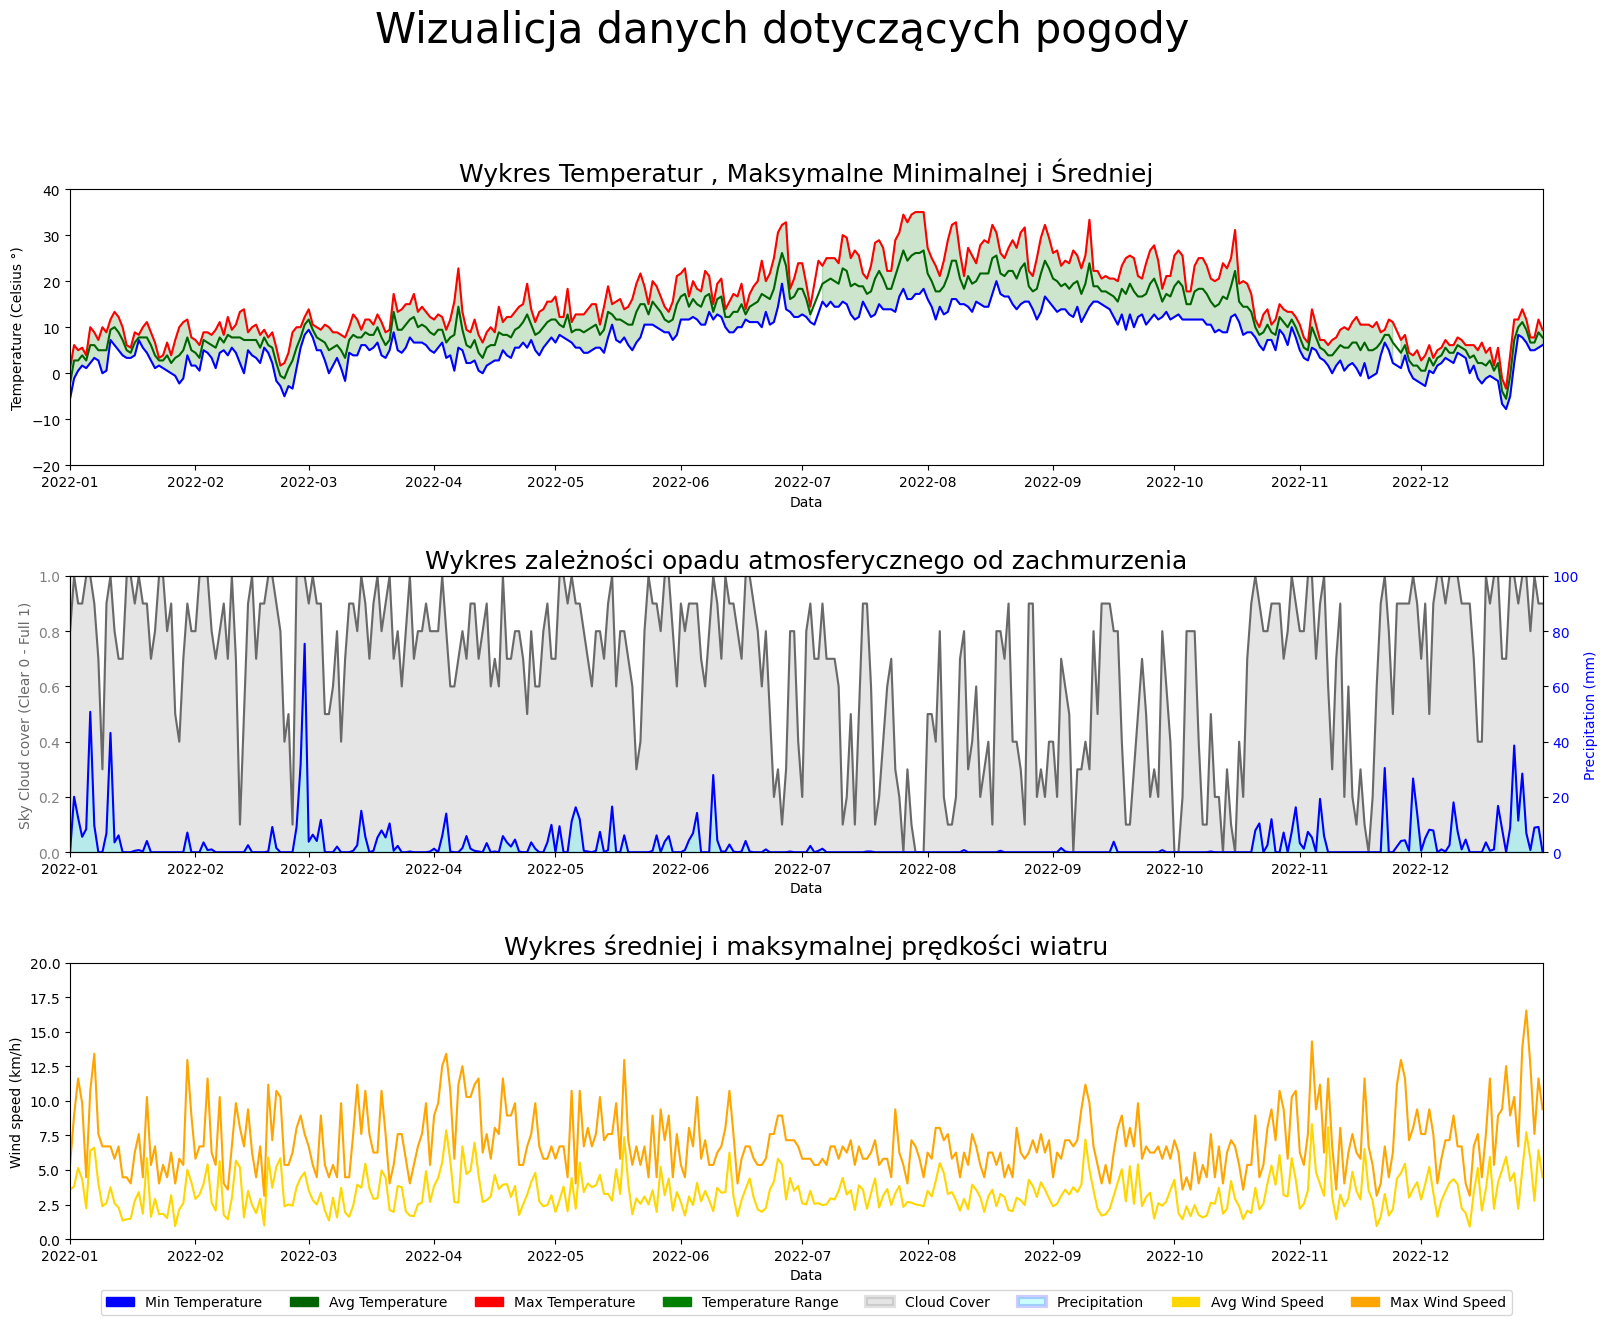

In [13]:
# YOUR CODE HERE
# sns lineplot i seaborn
import matplotlib.patches as mpatches

fig, axs = plt.subplots(nrows=3, figsize=(19, 15), gridspec_kw={'top': 0.8})
fig.suptitle('Wizualicja danych dotyczących pogody', fontsize=30, y=0.92)

wth = weather_data.copy()
wth.index = wth.index.to_timestamp()

# Wykres dla axs[0]
sns.lineplot(data=wth, x=wth.index , y=('Temperature', 'Min'), ax=axs[0], color='blue')
sns.lineplot(data=wth, x=wth.index , y=('Temperature', 'Max'), ax=axs[0], color='red')
sns.lineplot(data=wth, x=wth.index , y=('Temperature', 'Avg'), ax=axs[0], color='darkgreen')
axs[0].fill_between(wth.index, wth[('Temperature', 'Min')], wth[('Temperature', 'Max')], color='green', alpha=0.2)
axs[0].set_ylabel('Temperature (Celsius °)')
axs[0].set_xlabel('Data')
axs[0].set_xlim([wth.index.values[0], wth.index.values[-1]])
axs[0].set_ylim(-20, 40)
axs[0].set_title('Wykres Temperatur , Maksymalne Minimalnej i Średniej', fontsize=18)

# Wyres dla axs[1]

sns.lineplot(data=wth, x=wth.index , y=('Sky', 'Cloud cover'), ax=axs[1], color='dimgrey')
axs[1].set_ylabel('Sky Cloud cover (Clear 0 - Full 1)', color='dimgrey')
axs[1].set_ylim(0, 1)
axs[1].tick_params(axis='y', labelcolor='grey')
ax22 = axs[1].twinx() # create a second y-axis for precipitation
sns.lineplot(data=wth, x=wth.index , y=('Precipitation', 'Total'), ax=ax22, color='blue')
ax22.set_ylim(0, 100)
ax22.set_ylabel('Precipitation (mm)', color='blue')
ax22.tick_params(axis='y', labelcolor='blue')
axs[1].fill_between(wth.index, wth[('Sky', 'Cloud cover')], color='grey', alpha=0.2)
ax22.fill_between(wth.index, wth[('Precipitation', 'Total')], color='cyan', alpha=0.2)
axs[1].set_title('Wykres zależności opadu atmosferycznego od zachmurzenia', fontsize=18)
axs[1].set_xlabel('Data')
axs[1].set_xlim([wth.index.values[0], wth.index.values[-1]])

# Wykres dla axs[2]

sns.lineplot(data=wth, x=wth.index , y=('Wind', 'Avg speed'), ax=axs[2], color='gold')
sns.lineplot(data=wth, x=wth.index , y=('Wind', 'Max speed'), ax=axs[2], color='orange')
axs[2].set_ylim(0, 20)
axs[2].set_ylabel('Wind speed (km/h)')
axs[2].set_xlabel('Data')
axs[2].set_title('Wykres średniej i maksymalnej prędkości wiatru', fontsize=18)
axs[2].set_xlim([wth.index.values[0], wth.index.values[-1]])
# add legend
legend_handles = [mpatches.Patch(color='blue', label='Min Temperature'),
                  mpatches.Patch(color='darkgreen', label='Avg Temperature'), 
                  mpatches.Patch(color='red', label='Max Temperature'),
                  mpatches.Patch(color='green', label='Temperature Range'),   
#                   mpatches.Patch(color='grey', alpha=0.2, label='Cloud Cover', edgecolor='dimgrey'),
                  mpatches.Patch(facecolor='grey', edgecolor='dimgrey', alpha=0.2, linewidth=3, label='Cloud Cover'),
                  mpatches.Patch(facecolor='cyan', edgecolor='blue', alpha=0.2, linewidth=3, label='Precipitation'),
                  mpatches.Patch(color='gold', label='Avg Wind Speed'),
                  mpatches.Patch(color='orange', label='Max Wind Speed')]
axs[2].legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=8)

fig.subplots_adjust(hspace=0.4, bottom=0.1)


plt.show()
fig.savefig('wykres.png')